In [1]:
#compare score info from txt file with rootfile information
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load file (assuming in the current repository)

fname = "./L1Ntuple.root" #all events
f = uproot.open(fname)
f.keys()


['l1EventTree;1',
 'l1EventTree/L1EventTree;1',
 'l1CaloTowerTree;1',
 'l1CaloTowerTree/L1CaloTowerTree;1',
 'l1UpgradeTfMuonTree;1',
 'l1UpgradeTfMuonTree/L1UpgradeTfMuonTree;1',
 'l1UpgradeTfMuonShowerTree;1',
 'l1UpgradeTfMuonShowerTree/L1UpgradeTfMuonShowerTree;1',
 'l1UpgradeTree;1',
 'l1UpgradeTree/L1UpgradeTree;1',
 'l1uGTTree;1',
 'l1uGTTree/L1uGTTree;1',
 'l1uGTTestcrateTree;1',
 'l1uGTTestcrateTree/L1uGTTree;1',
 'l1HOTree;1',
 'l1HOTree/L1HOTree;1',
 'l1UpgradeTfMuonEmuTree;1',
 'l1UpgradeTfMuonEmuTree/L1UpgradeTfMuonTree;1',
 'l1CaloTowerEmuTree;1',
 'l1CaloTowerEmuTree/L1CaloTowerTree;1',
 'l1CaloSummaryEmuTree;1',
 'l1CaloSummaryEmuTree/L1CaloSummaryTree;1',
 'l1UpgradeEmuTree;1',
 'l1UpgradeEmuTree/L1UpgradeTree;1',
 'l1uGTEmuTree;1',
 'l1uGTEmuTree/L1uGTTree;1',
 'l1GeneratorTree;1',
 'l1GeneratorTree/L1GenTree;1']

In [24]:
#get the test crate bits, the emulator bits, and event numbers
a_uGT_crate = f["l1uGTTestcrateTree/L1uGTTree"].arrays()
cratebits = a_uGT_crate.m_algoDecisionInitial
cratebits = ak.to_numpy(cratebits)
print(cratebits.shape) #-> this is (Nevents, 512) for 512 trigger bits of the uGT

a_uGT_emu = f["l1uGTEmuTree/L1uGTTree"].arrays() #THIS ONE MATCHES RESULTS IN TXT FILE
#a_uGT_emu = f["l1uGTTree/L1uGTTree"].arrays() #THIS ONE DOES NOT MATCH RESULTS IN TXT FILE
emubits = a_uGT_emu.m_algoDecisionInitial
emubits = ak.to_numpy(emubits)
print(emubits.shape) 

a_uGT_event = f["l1EventTree/L1EventTree"].arrays()
event = a_uGT_event.event

event = ak.to_numpy(event)
print(event.shape)

(1000, 512)
(1000, 512)
(1000,)


In [25]:
#map adt names to the bits
#not sure how Artur knew what bits to use
adt_trig_bits = {'L1_AXO_VLoose': 438, 'L1_AXO_Loose': 439, 'L1_AXO_Nominal': 440, 'L1_AXO_Tight': 441, 'L1_AXO_VTight': 442}

In [26]:
#here are my arrays
L1_VL = cratebits[:,438]
L1_L = cratebits[:,439]
L1_N = cratebits[:,440]
L1_T = cratebits[:,441]
L1_VT = cratebits[:,442]

L1emu_VL = emubits[:,438]
L1emu_L = emubits[:,439]
L1emu_N = emubits[:,440]
L1emu_T = emubits[:,441]
L1emu_VT = emubits[:,442]

#revelation: these are the module_index saved 

#can compare two numpy arrays to see what values dont match
comp_VL = L1_VL == L1emu_VL
comp_L = L1_L == L1emu_L
comp_N = L1_N == L1emu_N
comp_T = L1_T == L1emu_T
comp_VT = L1_VT == L1emu_VT



In [37]:
#n matching and not matching
nmatch =  {'L1_AXO_VLoose': 0, 'L1_AXO_Loose': 0, 'L1_AXO_Nominal': 0, 'L1_AXO_Tight': 0, 'L1_AXO_VTight': 0}

nmatch['L1_AXO_VLoose'] = sum(comp_VL[:])
nmatch['L1_AXO_Loose'] = sum(comp_L[:])
nmatch['L1_AXO_Nominal'] = sum(comp_N[:])
nmatch['L1_AXO_Tight'] = sum(comp_T[:])
nmatch['L1_AXO_VTight'] = sum(comp_VT[:])

print("Total N events Test Crate: %i" %len(cratebits))
print("Total N events Emulator: %i" %len(emubits))
sum(comp_VT[:])

Total N events Test Crate: 1000
Total N events Emulator: 1000


1000

In [57]:
#now let's read the text file with score information for this set of events
import re

score_values = [] #scores
inputs = [] #input vectors
results = [] #output trigger bits

# Open the file for reading
with open("L1Ntuple_info.txt", "r") as file: 
    
    # Iterate through each line in the file
    for line in file:
        matches_score = re.findall(r'score: (\d+)', line)
        matches_condResult = re.findall(r'condResult: (\d+)', line)
        matches_inputs = re.findall(r'ADModelInput: (\d+)', line)
        
        # If there are matches, append them to the list
        if matches_score:
            score_values.extend(float(match) for match in matches_score)

        #store trigger results:
        if matches_condResult:
            results.extend(float(match) for match in matches_condResult)

        #store inputs
        if line.startswith('ADModelInput:'):
            # Extract the part of the line containing numbers
            # This removes the prefix and the last characters ' ]' from the line
            numbers_part = line[len('ADModelInput: ['):-3]
            
            # Convert the string of numbers into a list of integers
            # This splits the string on commas, strips whitespace, and converts to integer
            numbers_list = [int(num.strip()) for num in numbers_part.split(',') if num.strip()]
            
            # Append the list of numbers to our list of model inputs
            inputs.append(numbers_list)
            #print(numbers_list)
            
# Print the list of loss values
#print(results)
#print(score_values)
#print(len(loss_values))
print(len(score_values))
#print(results)
print(len(inputs))
#inputs[:2]

5000
5000


In [63]:
#we only need every 5th value
#score_values is loss*16
score_values_perevt = score_values[4::5]
inputs_perevt = inputs[4::5]

#score_values_perevt
len(score_values_perevt)
len(inputs_perevt)
#score_values_perevt
#inputs_perevt

1000

In [45]:
#store the pass/fail value per event per threshold
results_VL = results[0::5]
results_L = results[1::5]
results_N = results[2::5]
results_T = results[3::5]
results_VT = results[4::5]

#results_VL[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [60]:
#see that the sums match by counting how many passing events in the rootfile and txt file
rootVL = sum(L1emu_VL[:])
rootL = sum(L1emu_L[:])
rootN = sum(L1emu_N[:])
rootT = sum(L1emu_T[:])
rootVT = sum(L1emu_VT[:])
print('from emulator rootfile:')
print(rootVL); print(rootL); print(rootN); print(rootT); print(rootVT);

textVL = sum(results_VL[:])
textL = sum(results_L[:])
textN = sum(results_N[:])
textT = sum(results_T[:])
textVT = sum(results_VT[:])
print('from textfile:')
print(textVL); print(textL); print(textN); print(textT); print(textVT); 

#how many passing events in the test crate l1uGTTestcrateTree/L1uGTTree
crateVL = sum(L1_VL[:])
crateL = sum(L1_L[:])
crateN = sum(L1_N[:])
crateT = sum(L1_T[:])
crateVT = sum(L1_VT[:])
print('from textfile:')
print(crateVL); print(crateL); print(crateN); print(crateT); print(crateVT); #ok so the crate is not getting filled

from emulator rootfile:
6
5
4
4
0
from textfile:
6.0
5.0
4.0
4.0
0.0
from textfile:
0
0
0
0
0


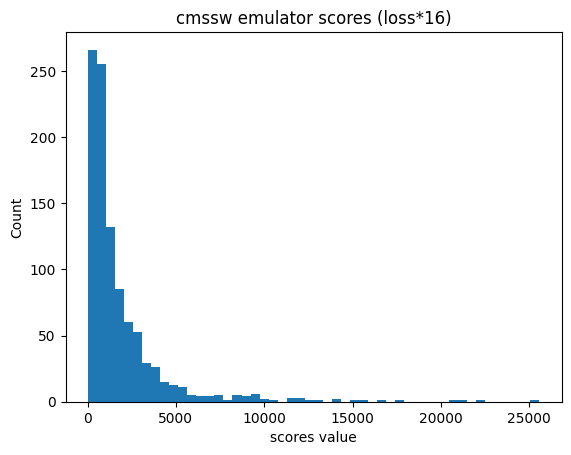

In [61]:
#ok so now lets make a histogram of the emulator scores overall
score_values_perevt
# Create a histogram
plt.hist(score_values_perevt, bins=50)#, color='blue')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('cmssw emulator scores (loss*16)')

# Show the histogram
plt.show()

In [62]:
#now lets make a list of the values that dont match each other 
mismatchVL = []
mismatchL = []
mismatchN = []
mismatchT = []
mismatchVT = []

for i in range(len(score_values_perevt)):
    #print(i)
    if not comp_VL[i]:
        mismatchVL.append(score_values_perevt[i])
    if not comp_L[i]:
        mismatchL.append(score_values_perevt[i])
    if not comp_N[i]:
        mismatchN.append(score_values_perevt[i])
    if not comp_T[i]:
        mismatchT.append(score_values_perevt[i])
        #print(score_values_perevt[i])
    if not comp_VT[i]:
        mismatchVT.append(score_values_perevt[i])
        #print(score_values_perevt[i])

mismatchT
#sum(comp_VL[:])

#len(score_values_perevt)
#this is just the scores of events that pass the threshold

[21454.0, 20516.0, 25557.0, 22253.0]

In [47]:
##################################################
#NOTE: EVERYTHING BELOW THIS CELL IS OLD/OUTDATED
##################################################

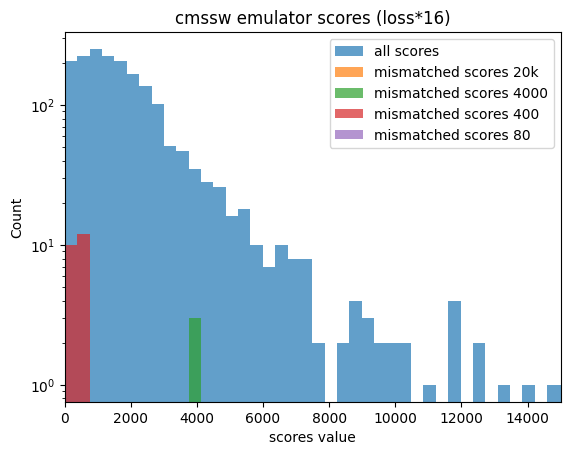

0
22
3
0


[]

In [63]:
#add these arrays

scorehist, bin_edges = np.histogram(score_values_perevt, bins=50)
hist80, _ = np.histogram(mismatch80, bins=bin_edges)
hist400, _ = np.histogram(mismatch400, bins=bin_edges)
hist4k, _ = np.histogram(mismatch4k, bins=bin_edges)
hist20k, _ = np.histogram(mismatch20k, bins=bin_edges)

plt.hist(score_values_perevt, bins=bin_edges, alpha=0.7, label='all scores')
plt.hist(mismatch20k, bins=bin_edges, alpha=0.7, label='mismatched scores 20k')
plt.hist(mismatch4k, bins=bin_edges, alpha=0.7, label='mismatched scores 4000')
plt.hist(mismatch400, bins=bin_edges, alpha=0.7, label='mismatched scores 400')
plt.hist(mismatch80, bins=bin_edges, alpha=0.7, label='mismatched scores 80')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('cmssw emulator scores (loss*16)')
plt.legend()
plt.yscale('log')
plt.xlim(0, 15000)

# Show the histogram
plt.show()
print(len(mismatch80)); print(len(mismatch400)); print(len(mismatch4k)); print(len(mismatch20k))
mismatch80


In [15]:
#let's see whether these are passing when they should have failed or vice versa
totevts = len(emubits)

#initialized to falses
epass_cfail_80 = [False]*totevts
efail_cpass_80 = [False]*totevts
epass_cfail_400 = [False]*totevts
efail_cpass_400 = [False]*totevts
epass_cfail_4k = [False]*totevts
efail_cpass_4k = [False]*totevts
epass_cfail_20k = [False]*totevts
efail_cpass_20k = [False]*totevts

for i in range(totevts): 
    #80
    if (L1emu_ADT_80[i] != L1_ADT_80[i] ):
        print('THR 80-> i: '+str(i)+' emu: '+str(L1emu_ADT_80[i])+' crate: '+str(L1_ADT_80[i]))
        if L1emu_ADT_80[i]: #emu pass, crate fail 
            epass_cfail_80[i] = True
        elif not L1emu_ADT_80[i]:
            efail_cpass_80[i] = True #emu fail, crate pass 
            
    if (L1emu_ADT_400[i] != L1_ADT_400[i] ):
        print('THR 400-> i: '+str(i)+' emu: '+str(L1emu_ADT_400[i])+' crate: '+str(L1_ADT_400[i]))
        if L1emu_ADT_400[i]: #emu pass, crate fail 
            epass_cfail_400[i] = True
        elif not L1emu_ADT_400[i]:
            efail_cpass_400[i] = True #emu fail, crate pass
            
    if (L1emu_ADT_4000[i] != L1_ADT_4000[i] ):
        print('THR 4k-> i: '+str(i)+' emu: '+str(L1emu_ADT_4000[i])+' crate: '+str(L1_ADT_4000[i]))
        if L1emu_ADT_4000[i]: #emu pass, crate fail 
            epass_cfail_4k[i] = True
        elif not L1emu_ADT_4000[i]:
            efail_cpass_4k[i] = True #emu fail, crate pass 
    
    if (L1emu_ADT_20000[i] != L1_ADT_20000[i] ):
        print('THR 20k-> i: '+str(i)+' emu: '+str(L1emu_ADT_20000[i])+' crate: '+str(L1_ADT_20000[i]))
        if L1emu_ADT_20000[i]: #emu pass, crate fail 
            epass_cfail_20k[i] = True
        elif not L1emu_ADT_20000[i]:
            efail_cpass_20k[i] = True #emu fail, crate pass 

#check that it makes sense
print(sum(efail_cpass_400))
print(sum(epass_cfail_400))
print(sum(epass_cfail_400) + sum(efail_cpass_400))

THR 4k-> i: 75 emu: False crate: True
THR 400-> i: 131 emu: False crate: True
THR 400-> i: 160 emu: False crate: True
THR 400-> i: 187 emu: True crate: False
THR 400-> i: 260 emu: False crate: True
THR 4k-> i: 399 emu: False crate: True
THR 400-> i: 560 emu: False crate: True
THR 400-> i: 580 emu: True crate: False
THR 400-> i: 625 emu: True crate: False
THR 400-> i: 689 emu: False crate: True
THR 400-> i: 704 emu: False crate: True
THR 400-> i: 754 emu: False crate: True
THR 4k-> i: 791 emu: False crate: True
THR 400-> i: 1063 emu: False crate: True
THR 400-> i: 1116 emu: False crate: True
THR 400-> i: 1214 emu: True crate: False
THR 400-> i: 1231 emu: True crate: False
THR 400-> i: 1332 emu: False crate: True
THR 400-> i: 1352 emu: True crate: False
THR 400-> i: 1442 emu: False crate: True
THR 400-> i: 1522 emu: False crate: True
THR 400-> i: 1539 emu: True crate: False
THR 400-> i: 1556 emu: False crate: True
THR 400-> i: 1586 emu: True crate: False
THR 400-> i: 1805 emu: False crat

In [16]:
#let's make a dataframe to print this nicely
import pandas as pd
Tc = len(cratebits)
Te = len(emubits)

table = {'Threshold': ['80', '400', '4k', '20k'],
        '# pass emulator': [sum(L1emu_ADT_80), sum(L1emu_ADT_400), sum(L1emu_ADT_4000), sum(L1emu_ADT_20000)],
        '# pass crate': [sum(L1_ADT_80), sum(L1_ADT_400), sum(L1_ADT_4000), sum(L1_ADT_20000)],
        '# fail emulator': [Te-sum(L1emu_ADT_80), Te-sum(L1emu_ADT_400), Te-sum(L1emu_ADT_4000), Te-sum(L1emu_ADT_20000)],
        '# fail crate': [Te-sum(L1_ADT_80), Te-sum(L1_ADT_400), Te-sum(L1_ADT_4000), Te-sum(L1_ADT_20000)],
        '% pass crate': [(sum(L1_ADT_80))/Te, (sum(L1_ADT_400))/Te, (sum(L1_ADT_4000))/Te, (sum(L1_ADT_20000))/Te],
        '% pass emulator': [sum(L1emu_ADT_80)/Te, sum(L1emu_ADT_400)/Te, sum(L1emu_ADT_4000)/Te, sum(L1emu_ADT_20000)/Te],
        '# mismatch': [Te-sum(comp80), Te-sum(comp400), Te-sum(comp4000), Te-sum(comp20000)],
     #   '% mismatch (#mismatch/#pass emu)': [(Te-sum(comp80))/sum(L1emu_ADT_80), (Te-sum(comp400))/sum(L1emu_ADT_400), (Te-sum(comp4000))/sum(L1emu_ADT_4000), (Te-sum(comp20000))/sum(L1emu_ADT_20000)],
        '# pass emu + fail crate': [sum(epass_cfail_80), sum(epass_cfail_400), sum(epass_cfail_4k), sum(epass_cfail_20k)],
        '# fail emu + pass crate': [sum(efail_cpass_80), sum(efail_cpass_400), sum(efail_cpass_4k), sum(efail_cpass_20k)],
        }
tbl = pd.DataFrame(table)


print(tbl)

  Threshold  # pass emulator  # pass crate  # fail emulator  # fail crate  \
0        80             1794          1794               17            17   
1       400             1596          1602              215           209   
2        4k              169           172             1642          1639   
3       20k                0             0             1811          1811   

   % pass crate  % pass emulator  # mismatch  # pass emu + fail crate  \
0      0.990613         0.990613           0                        0   
1      0.884594         0.881281          22                        8   
2      0.094975         0.093319           3                        0   
3      0.000000         0.000000           0                        0   

   # fail emu + pass crate  
0                        0  
1                       14  
2                        3  
3                        0  


1794
17
0
0


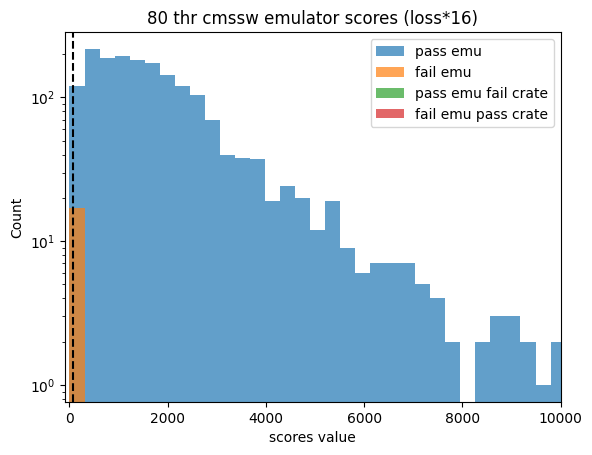

array([33., 25., 14., 35., 15., 76., 23., 22., 18., 50., 15., 67., 48.,
       72., 15., 69., 65.])

In [70]:
#start with threshold 80

#ok so now lets make a histogram of the emulator scores overall THAT PASS A CERTAIN THRESHOLD

#have to mask with the ones actually passing the emulator
score_values_perevt = np.array(score_values_perevt)
pscores80 = score_values_perevt[L1emu_ADT_80]
fscores80 = score_values_perevt[~L1emu_ADT_80]
print(len(pscores80)) #should match #pass
print(len(fscores80))


epass_cfail_80 = np.array(epass_cfail_80)
efail_cpass_80 = np.array(efail_cpass_80)
misfscores80 = score_values_perevt[efail_cpass_80]
mispscores80 = score_values_perevt[epass_cfail_80]
print(len(misfscores80))
print(len(mispscores80))

bin_edges = np.linspace(0, 15000, 50, dtype=float)
bin_edges = list(bin_edges)

# Create a histogram
plt.hist(pscores80 , bins=bin_edges, alpha=0.7, label='pass emu')
plt.hist(fscores80 , bins=bin_edges, alpha=0.7, label='fail emu')
plt.hist(mispscores80, bins=bin_edges, alpha=0.7, label='pass emu fail crate')
plt.hist(misfscores80, bins=bin_edges, alpha=0.7, label='fail emu pass crate')

#vertical line at threshold
plt.axvline(x=80, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('80 thr cmssw emulator scores (loss*16)')
plt.legend()
plt.xlim(-100, 10000)
plt.yscale('log')


# Show the histogram
plt.show()
fscores80

1596
215
14
8


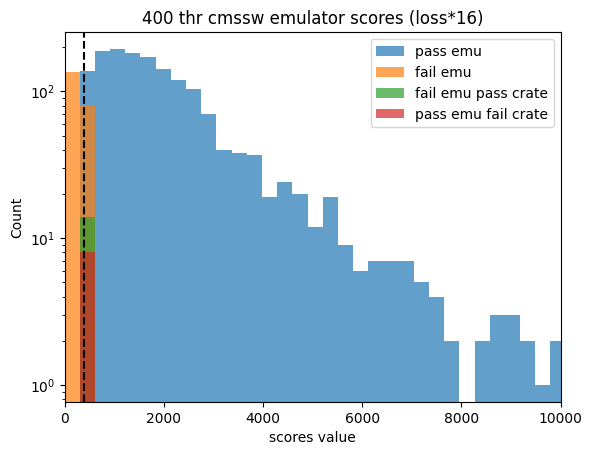

In [69]:
#threshold 400

#ok so now lets make a histogram of the emulator scores overall THAT PASS A CERTAIN THRESHOLD

#have to mask with the ones actually passing the emulator
score_values_perevt = np.array(score_values_perevt)
pscores400 = score_values_perevt[L1emu_ADT_400]
fscores400 = score_values_perevt[~L1emu_ADT_400]
print(len(pscores400)) #should match #pass
print(len(fscores400)) #should match #pass


epass_cfail_400 = np.array(epass_cfail_400)
efail_cpass_400 = np.array(efail_cpass_400)
misfscores400 = score_values_perevt[efail_cpass_400]
mispscores400 = score_values_perevt[epass_cfail_400]
print(len(misfscores400))
print(len(mispscores400))

bin_edges = np.linspace(0, 15000, 50, dtype=float)
bin_edges = list(bin_edges)

# Create a histogram
plt.hist(pscores400 , bins=bin_edges, alpha=0.7, label='pass emu')
plt.hist(fscores400 , bins=bin_edges, alpha=0.7, label='fail emu')
plt.hist(misfscores400, bins=bin_edges, alpha=0.7, label='fail emu pass crate')
plt.hist(mispscores400, bins=bin_edges, alpha=0.7, label='pass emu fail crate')

#vertical line at threshold
plt.axvline(x=400, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('400 thr cmssw emulator scores (loss*16)')
plt.legend()
plt.yscale('log')
plt.xlim(0, 10000)

# Show the histogram
plt.show()


169
1642
3
0


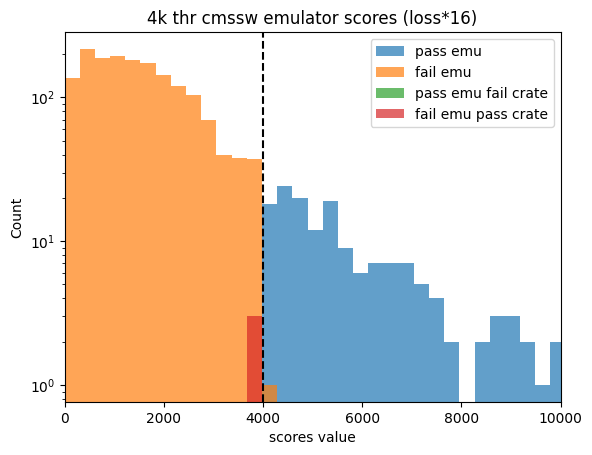

In [68]:
#threshold 4k

#ok so now lets make a histogram of the emulator scores overall THAT PASS A CERTAIN THRESHOLD

#have to mask with the ones actually passing the emulator
score_values_perevt = np.array(score_values_perevt)
pscores4k = score_values_perevt[L1emu_ADT_4000]
fscores4k = score_values_perevt[~L1emu_ADT_4000]
print(len(pscores4k)) #should match #pass
print(len(fscores4k))


epass_cfail_4k = np.array(epass_cfail_4k)
efail_cpass_4k = np.array(efail_cpass_4k)
misfscores4k = score_values_perevt[efail_cpass_4k]
mispscores4k = score_values_perevt[epass_cfail_4k]
print(len(misfscores4k))
print(len(mispscores4k))

bin_edges = np.linspace(0, 15000, 50, dtype=float)
bin_edges = list(bin_edges)

# Create a histogram
plt.hist(pscores4k , bins=bin_edges, alpha=0.7, label='pass emu')
plt.hist(fscores4k , bins=bin_edges, alpha=0.7, label='fail emu')
plt.hist(mispscores4k, bins=bin_edges, alpha=0.7, label='pass emu fail crate')
plt.hist(misfscores4k, bins=bin_edges, alpha=0.7, label='fail emu pass crate')

#vertical line at threshold
plt.axvline(x=4000, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('4k thr cmssw emulator scores (loss*16)')
plt.legend()
plt.xlim(0, 10000)
plt.yscale('log')

# Show the histogram
plt.show()


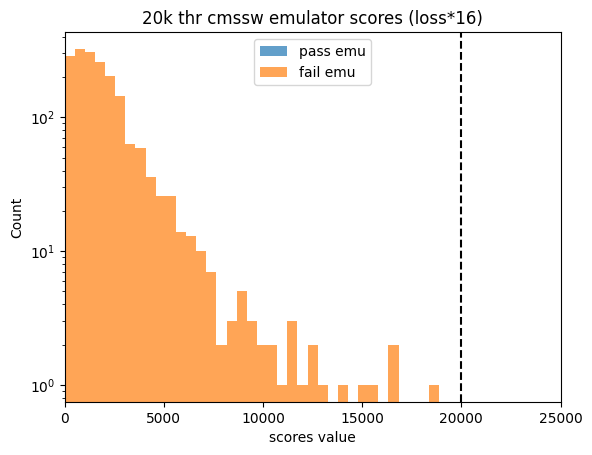

In [67]:
#threshold  20k

#ok so now lets make a histogram of the emulator scores overall THAT PASS A CERTAIN THRESHOLD

#have to mask with the ones actually passing the emulator
score_values_perevt = np.array(score_values_perevt)
pscores20k = score_values_perevt[L1emu_ADT_20000]
fscores20k = score_values_perevt[~L1emu_ADT_20000]
#print(len(scores20k)) #should match #pass

bin_edges = np.linspace(0, 25000, 50, dtype=float)
bin_edges = list(bin_edges)

# Create a histogram
plt.hist(pscores20k , bins=bin_edges, alpha=0.7, label='pass emu')
plt.hist(fscores20k , bins=bin_edges, alpha=0.7, label='fail emu')



#vertical line at threshold
plt.axvline(x=20000, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('scores value')
plt.ylabel('Count')
plt.title('20k thr cmssw emulator scores (loss*16)')
plt.xlim(0, 25000)
plt.legend()
plt.yscale('log')

# Show the histogram
plt.show()
#there are none